<br>

<h1 style="text-align:center;">Credit Card Fraud Detection (Imbalance Classification)</h1>

<br>

## Introduction

---

In this project, we aim to develop a classification model tailored for datasets with imbalanced distributions, specifically focusing on identifying fraudulent transactions in credit card data.

In [1]:
# Import the libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Set matplotlib style
plt.style.use('ggplot')

<br>

## Load Dataset

---

Data source: https://www.kaggle.com/mlg-ulb/creditcardfraud/

In [3]:
# Load the dataset
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<br>

## EDA

---

In this section, we will explore the data.

In [4]:
# Basic Information
print(df.shape)
print(df.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [5]:
# Statistical Summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Check for Missing Values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


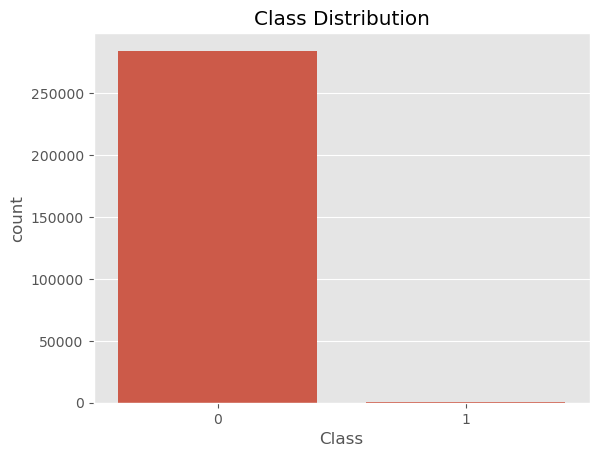

In [7]:
# Distribution of Target Variable (Class)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

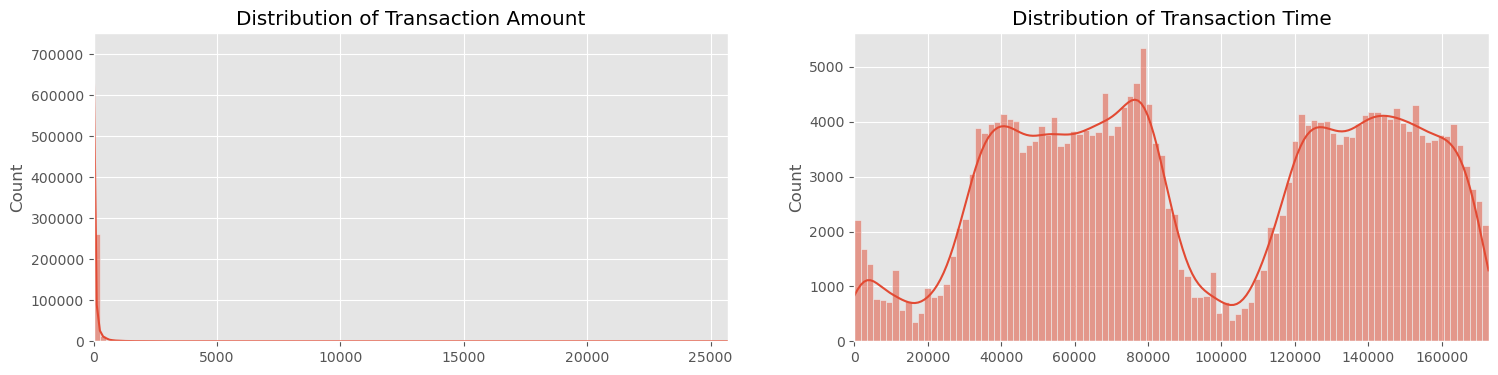

In [8]:
# Amount and Time Analysis
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], bins=100, kde=True)
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], bins=100, kde=True)
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

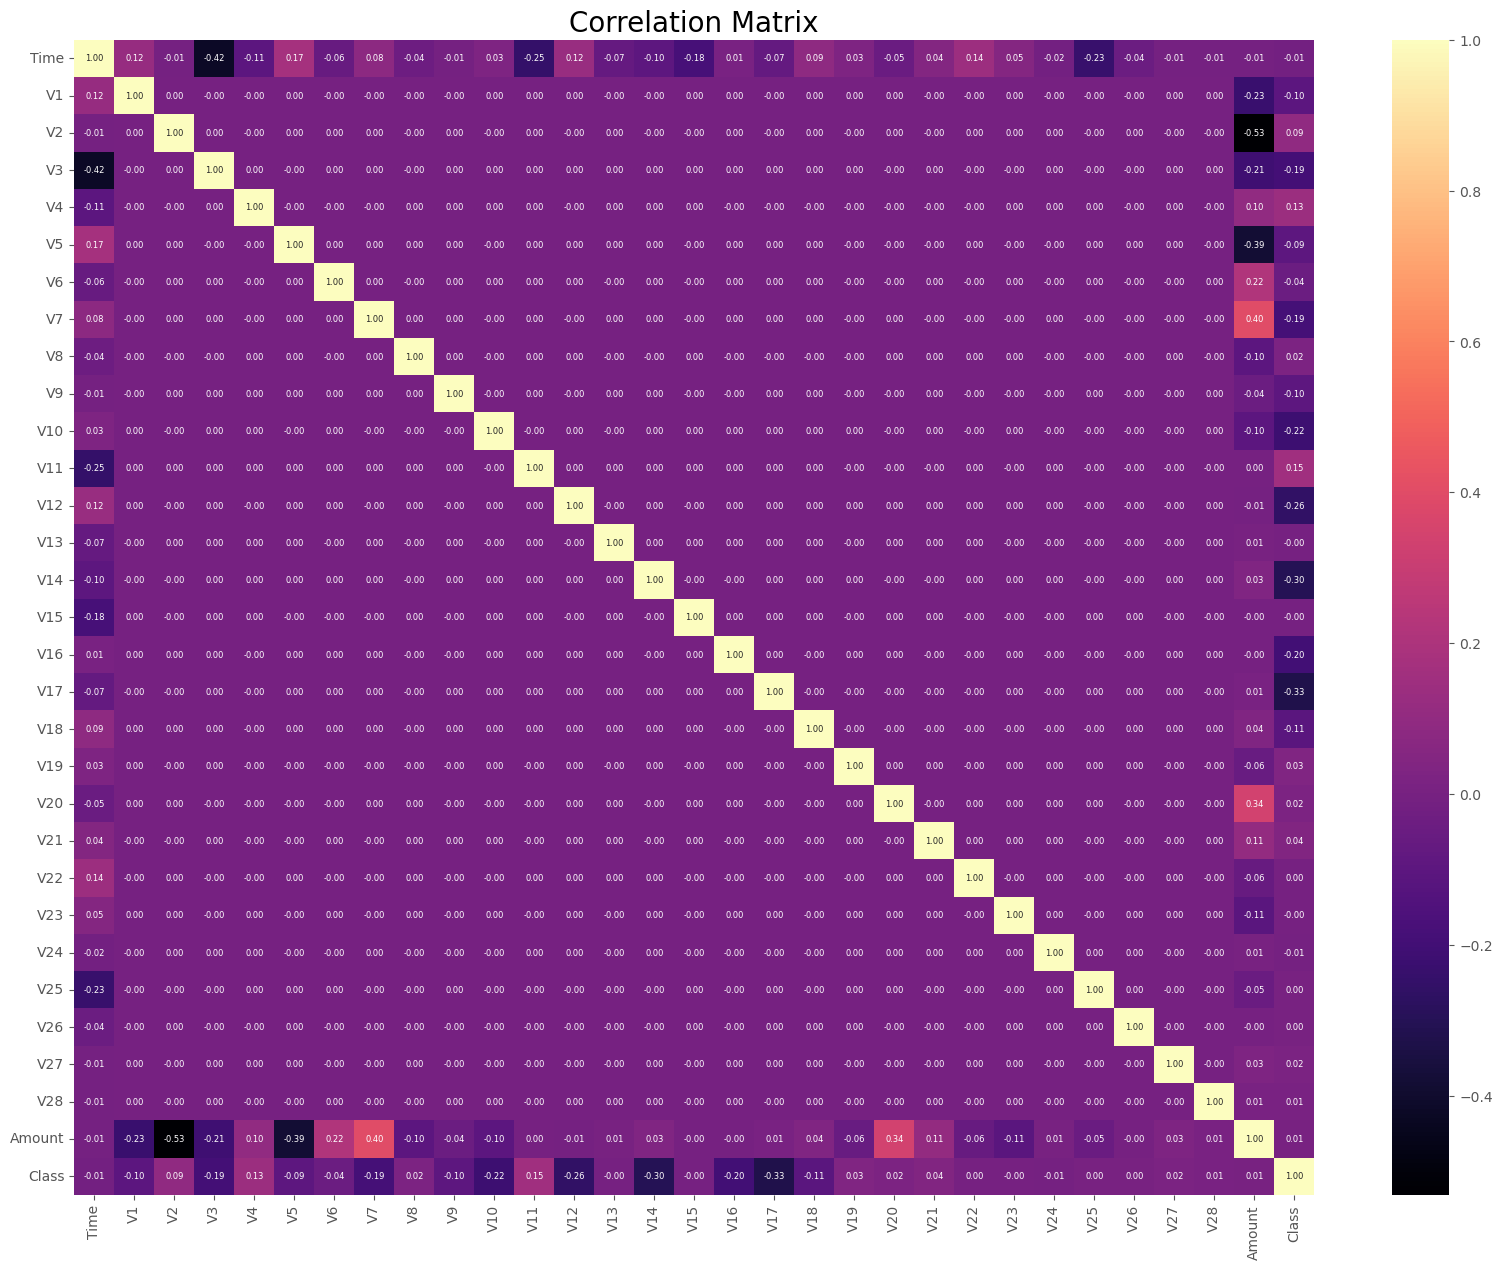

In [9]:
# Correlation Analysis
corr = df.corr()
plt.figure(figsize=(20, 15))  
# mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f", annot_kws={'size': 6})
plt.title("Correlation Matrix", size=20)
plt.show()

<br>

## Data Prepration

---

In this section, we will prepare the dataset for modeling.

In [10]:
# Specify the features and target
features = df.drop('Class', axis=1).values.astype('float32')
targets = df['Class'].values.reshape(-1, 1).astype('uint8')

print(f"features.shape: {features.shape}")
print(f"targets.shape: {targets.shape}")

features.shape: (284807, 30)
targets.shape: (284807, 1)


In [11]:
# Split to training and validation sets
train_features, val_features, train_targets, val_targets = train_test_split(
    features, 
    targets, 
    test_size=0.2, 
    random_state=42
)

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 227845
Number of validation samples: 56962


In [12]:
# Analyze class imbalance in the targets
counts = np.bincount(train_targets[:, 0])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

Number of positive samples in training data: 394 (0.17% of total)


In [13]:
# Set weights for each class (to handle class imbalance)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

In [14]:

# Normalize the data
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)

<br>

## Classification Model

---

In this section, implement a classification model for the imbalance dataset.

In [15]:
# Model architecture
model = keras.Sequential()
model.add(layers.Input(shape=train_features.shape[1:]))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 139,777
Trainable params: 139,777
Non-trai

In [16]:
# Metrics to be for evaluation
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

In [17]:
# Callbacks while training
callbacks = [keras.callbacks.ModelCheckpoint("./checkpoint/fraud_model_at_epoch_{epoch}.keras")]

# Class weights (for handling class imbalance)
class_weight = {0: weight_for_0, 1: weight_for_1}

# Train the model
model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=30,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

Epoch 1/30
112/112 - 3s - loss: 2.3062e-06 - fn: 53.0000 - fp: 27830.0000 - tn: 199621.0000 - tp: 341.0000 - precision: 0.0121 - recall: 0.8655 - val_loss: 0.1586 - val_fn: 9.0000 - val_fp: 2247.0000 - val_tn: 54617.0000 - val_tp: 89.0000 - val_precision: 0.0381 - val_recall: 0.9082 - 3s/epoch - 23ms/step
Epoch 2/30
112/112 - 1s - loss: 1.5163e-06 - fn: 32.0000 - fp: 7570.0000 - tn: 219881.0000 - tp: 362.0000 - precision: 0.0456 - recall: 0.9188 - val_loss: 0.1272 - val_fn: 8.0000 - val_fp: 1652.0000 - val_tn: 55212.0000 - val_tp: 90.0000 - val_precision: 0.0517 - val_recall: 0.9184 - 526ms/epoch - 5ms/step
Epoch 3/30
112/112 - 1s - loss: 1.1299e-06 - fn: 24.0000 - fp: 8135.0000 - tn: 219316.0000 - tp: 370.0000 - precision: 0.0435 - recall: 0.9391 - val_loss: 0.0754 - val_fn: 9.0000 - val_fp: 1126.0000 - val_tn: 55738.0000 - val_tp: 89.0000 - val_precision: 0.0733 - val_recall: 0.9082 - 529ms/epoch - 5ms/step
Epoch 4/30
112/112 - 1s - loss: 1.0891e-06 - fn: 22.0000 - fp: 8719.0000 - tn

<br>

## Evaluation

---

In this section, we will evaluate the model.

In [18]:
# For threshold-based metrics
predictions = model.predict(val_features)
predictions = (predictions > 0.5).astype(int)  # Assuming a threshold of 0.5

# For ROC-AUC score
probabilities = model.predict(val_features).flatten()

1781/1781 [==============================] - 2s 1ms/step


In [19]:
# Calculate metrics
accuracy = accuracy_score(val_targets, predictions)
precision = precision_score(val_targets, predictions)
recall = recall_score(val_targets, predictions)
f1 = f1_score(val_targets, predictions)
roc_auc = roc_auc_score(val_targets, probabilities)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

Accuracy: 0.9873
Precision: 0.1072
Recall: 0.8673
F1 Score: 0.1908
ROC-AUC Score: 0.9826
